In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


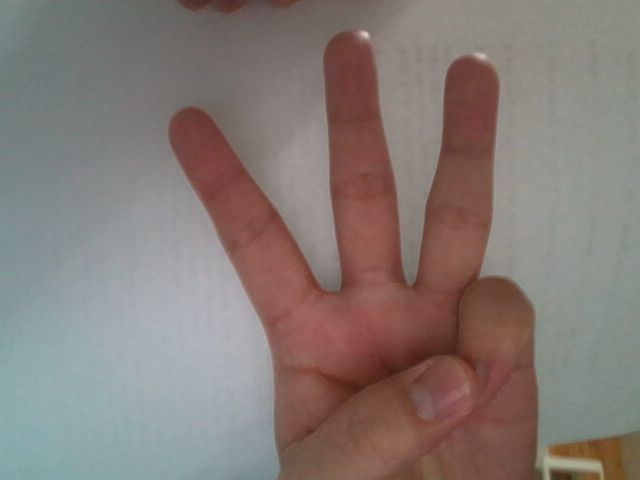

In [3]:
36.36
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

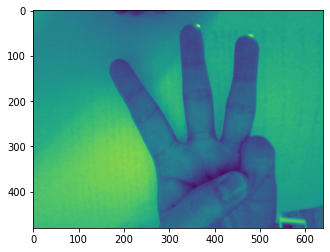

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
img = cv2.imread("./photo.jpg",cv2.IMREAD_GRAYSCALE)
#img = cv2.imread("./photo.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

(1, 28, 28, 1)


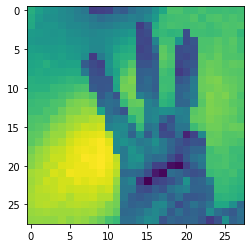

In [5]:
test_img = cv2.resize(img, (28,28))
plt.figure(figsize=(4,4))
plt.imshow(test_img)

#normalizing the dataset
test_img=test_img.astype('float32')/255
test_img=test_img.reshape(1,28,28,1)
print(test_img.shape)

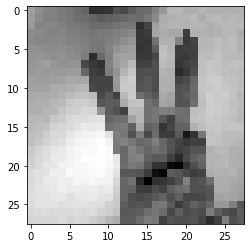

In [6]:
flog = open("data.log", "w")
plt.imshow(test_img.reshape(28,28), cmap='gray')
for i in range(28):
    for j in range(28):
        print("%d "%abs((test_img[0][i][j][0]*255).astype(int)), file = flog, end=' ')
        print("", file = flog) 
print("", file = flog) 
for i in range(28):
    for j in range(28):
        print("%d "%abs((test_img[0][i][j][0]*255).astype(int)), file = flog, end=' ') 
    print("", file = flog)  
print("", file = flog)
flog.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, utils
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
sign_mnist = models.load_model('/content/drive/MyDrive/공부/아이덱/sign_mnist/sign_mnist.h5')
sign_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [9]:
predicted_result_1 = sign_mnist.predict(test_img)
predicted_labels_1 = np.argmax(predicted_result_1, axis=1)
print(predicted_labels_1)

[22]
